### Exponential growth
If the bacteria divide every $\tau$ minutes and we started with a single cell, we would go from 
$$
1 \to 2 \to 4 \to 8 \ldots
$$
etc after a time 
$$
0 \to \tau \to 2\tau \to 3\tau \ldots
$$

This assumes that every cells divide exactly $\tau$ minutes after is born and cells stay syncronized forever. This is probably not the case: there is a distribution of division times not a single value $\tau$.

Alternatively, we could assume that the cells are completely desynchronized. In this case, the number of cells $n(t)$ would change in a time interval $\Delta t$ approximately as 
$$
n(t+\Delta t) = n(t) + \frac{\Delta t}{\tau} n(t)
$$
where $\frac{\Delta t}{\tau}$ is the fraction of cells that divide during the time interval $\Delta t$. This finite difference equation can be readily rearranged to resemble a differential equation

<font color=red>
$$
\lim_{\Delta t\to 0} \frac{n(t+\Delta t)-n(t)}{\Delta t} = \frac{dn(t)}{dt} = \frac{n(t)}{\tau}
$$
</font>

This differential equation means "the rate at which $n(t)$ changes is proportional to $n(t)$" -- this is the hall-mark of exponential growth. This equation is again one with an exactly known solution given by
$$
n(t) = n_0 e^{t/\tau}
$$
where $n_0$ is the initial number of cells. (Confirm this by direct differentiation).

### Numerical solution
While exponential growth is again a case that as an exact solution, it is instructive to solve it numerically. We will use this example to demonstrate some challenges in numerical integration of differential equations.
In particular, we will investigate how the accuracy of the solution depends on the step size $\Delta t$.

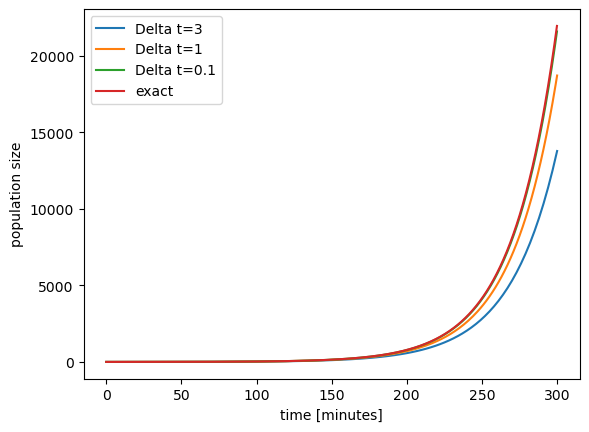

In [1]:
import numpy as np  # import of numerics library -- we need the exponential function
import matplotlib.pyplot as plt
tau = 30 # division time of 30 minutes
n_0 = 1
t_0 = 0
tmax = 10*tau # simulate this process for 10 times the average division time. 

for Delta_t in [3,1, 0.1]:
    n = [n_0]
    t = [t_0]
    for i in range(int(tmax//Delta_t)):  # number of steps necessary is tmax divided by step size = tmax/Delta_t
        n.append(n[i] + n[i]*Delta_t/tau)
        t.append(t[i] + Delta_t)
    
    plt.plot(t, n, label=f"Delta t={Delta_t}")

plt.plot(t, n_0*np.exp(np.array(t)/tau), label="exact")
plt.xlabel("time [minutes]")
plt.ylabel("population size")
plt.legend()
#plt.yscale('log')

# Accuracy depends on step size
As we saw above, the accuracy of the solution depends quite critically on the step size `Delta t`. The problem is that at every step, we slightly undershoot since the curve continues to bend upwards:

![image.png](figures/numeric_errors_ODE.png)

Sometimes, it is sufficient to simply choose a small enough step size. But more generally one needs to use a more sophisticated method than the simple forward stepping we have done here (called ["Forward-Euler" method](https://en.wikipedia.org/wiki/Euler_method)). A good compromise is typically the [Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) which is implemented in most numerical computation packages. 

For more conceptual purposes and simple exploration, the forward Euler method is still useful and we will continue to use it. 


## Logistic Growth
In the previous notebook, we explored linear and exponential growth. In both cases, growth goes on forever -- a situation that doesn't typically happen for example since bacteria run out of food. So lets walk through such an example:

 * the food initially available is $C_0$
 * division of a bacterium requires $x$ amount of food. Hence there can at most by $N = C_0/x$ new bacteria at the end
 * the food remaining after time $t$ is $C(t) = C_0 - x\times(n(t)-n_0)$.
 * lets assume the rate of division decreases proportionally with the available food $\frac{C(t)}{C_0\tau}$
 
![image.png](figures/nutrient_vs_consumption.png)

With these assumptions and definitions, we find a difference equation

$$
\begin{split}
n(t+\Delta t) & = n(t) + \Delta t\times \alpha n(t)\times \frac{C(t)}{C_0} \\
&= n(t) + \Delta t\times \alpha n(t)\times \left(1- \frac{x(n(t) - n_0)}{C_0}\right) \\
&= n(t) + \Delta t\times \alpha n(t)\times \left(1- \frac{n(t) - n_0}{N}\right)
\end{split}
$$

Rearranging this into a differential equation in the usual way results in 

$$
\lim_{\Delta t \to 0} \frac{n(t+\Delta t) - n(t)}{\Delta t}  = \frac{dn(t)}{dt} = \alpha n(t)\times \left(1- \frac{n(t) - n_0}{N}\right)
$$

This can be further simplified by realizing that whenever it matters, the $n(t)\gg n_0$ so that we can simply drop $n_0$ from the right hand side to obtain the standard logistic differential equation:

<font color='red'>
$$
\frac{dn(t)}{dt} = \alpha n(t)\left(1- \frac{n(t)}{N}\right)
$$
</font>
    Here $N$ is often called carrying capacity. 

Before we start solving this equation, lets look at the case $n(t)\ll N$!

In this case, the equation simplifies

$$
\frac{dn(t)}{dt} = \alpha n(t)\left(1- n(t)/N\right) \approx \alpha n(t)
$$

This is simply exponential growth like we have seen before, but we expect this approximation only to be valid while

$$
n(t)\approx n_0 e^{\alpha t} \ll N
$$

In [2]:
# define function that return derivative
def dndt(n, alpha, N):
    return alpha*n*(1-n/N)

In [7]:
alpha = 1/30 # division time of 30 minutes, rate is inverse
N = 10000
n_0 = 1
n = [n_0]
t = [0]
Delta_t = 0.1
tmax = 15/alpha
for i in range(int(tmax//Delta_t)):  # number of steps necessary is tmax divided by step size = tmax/Delta_t
    n.append(n[i] + Delta_t * dndt(n[i],alpha,N))
    t.append(t[i] + Delta_t)

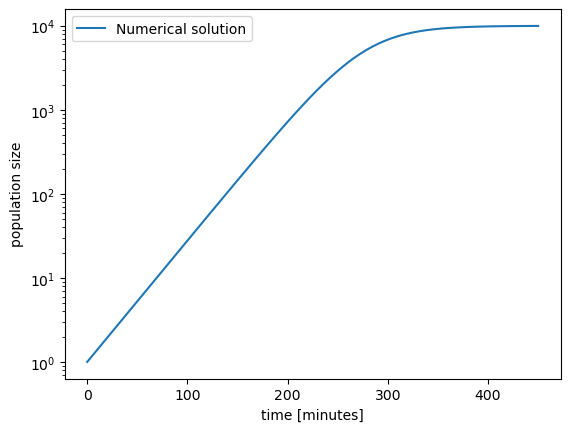

In [8]:
import matplotlib.pyplot as plt
plt.plot(t, n, label=f"Numerical solution")
plt.xlabel("time [minutes]")
plt.ylabel("population size")
plt.yscale('log')
plt.legend()

The logistic equation has an exact solution:

$$
n(t) = N\frac{e^{\alpha t}}{N/n_0 - 1 + e^{\alpha t}}
$$

At $t=0$ we have $n(0) = n_0$ as it has to be. At very large $t$, the solution tends to $N$. 

The solution to the logistic equation can be parameterized in different ways and we'll explore these more in the exercises. 


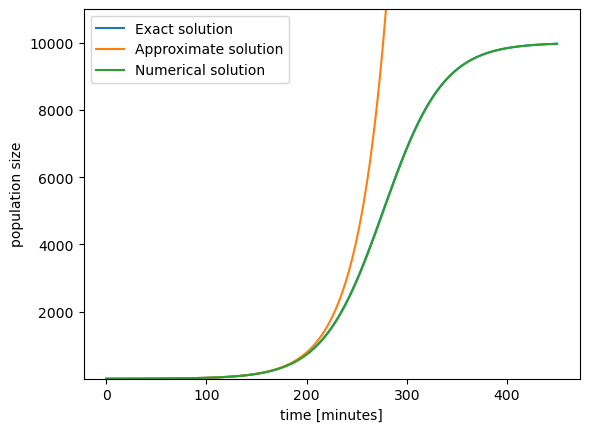

In [11]:
import numpy as np
def logistic(t, alpha, n_0, N):
    t_arr = np.array(t)
    return N*np.exp(alpha*t_arr)/(N/n_0-1+np.exp(alpha*t_arr))

plt.plot(t, logistic(t,alpha, n_0 ,N), label="Exact solution")
plt.plot(t, n_0*np.exp(alpha*np.array(t)), label="Approximate solution")
plt.plot(t, n, label=f"Numerical solution")
plt.xlabel("time [minutes]")
plt.ylabel("population size")
plt.ylim(1,N*1.1)
#plt.yscale('log')
plt.legend()

### Dig deeper
 * change $\tau$, $n_0$, and $N$ in the above graphs and explore how the results change.
 * verify the solution to the logistic equation.
 * graph the output on a logarithmic scale.